
## Introduction to Algorithmic Collusion

## Background
The Netherlands Authority for Consumers and Markets (ACM) is an antitrust authority. Its primary goal is to ensure fair competition and protect consumers from anticompetitive practices. With the rise of artificial intelligence (AI) and machine learning, a new challenge has emerged: algorithmic collusion. This phenomenon occurs when algorithms, designed to optimize pricing strategies, inadvertently or deliberately engage in collusive behaviour, leading to supra-competitive prices. 

## Understanding Algorithmic Collusion
Algorithmic collusion refers to the situation where pricing algorithms, often used by companies to set prices dynamically, result in higher prices than in traditional competition. Unlike human collusion, where firms explicitly agree to fix prices, algorithmic collusion can occur without any direct communication between firms. Instead, it arises from the algorithms' learning processes and their responses to market conditions. 
The outcomes of theoretical simulations of early studies reported in e.g. Calvano et al. (2020) and Klein (2021) have generated algorithmic collusion. Recently, Xavier Lambin  and co-authors have challenged these results and attributed algorithmic collusion to the simultaneous setup of the simulations, see e.g. Abada and Lambin (2023) and Lambin (2024). In these assignment we are going to use a simplified market to test these results and show when algorithmic collusion appears.

# Key Concerns
1.	Simultaneous Experimentation: Algorithms often experiment with different pricing strategies simultaneously. This can lead to high prices as they learn from each other's actions.
2.	Learning Inertia: Reinforcement learning algorithms may exhibit inertia, where initial high prices persist over time due to the learning process.
3.	Memoryless Environments: Even in environments where algorithms do not consider past actions, high prices can still emerge.
Policy Implications
Traditional antitrust measures may not be sufficient to address algorithmic collusion. Reducing market transparency, for example, may not effectively lower prices. Instead, the ACM needs to consider new approaches, such as enforcing sequential learning, where algorithms take turns exploring pricing strategies.

ME case: Running Simulations
To better understand algorithmic collusion, the ACM has hired you as a consultant to run simulations. Here’s a step-by-step guide:
1.	Set Up the Environment: Use a programming language like R or Python (and libraries such as NumPy and Matplotlib).
2.	Define the Market: Set up a market with two firms, each using a Q-learning algorithm. You may consider either homogeneous or differentiated products, competition in either prices (Bertrand) or quantities (Cournot) and whether prices are set either simultaneously (Lambin, 2024) or sequentially (Klein, 2021). One combination suffices.
3.	Implement Q-Learning: Create a Q-learning algorithm that simulates decisions in your duopoly market.
4.	Run Simulations: Allow the algorithms to explore and exploit strategies over multiple iterations similar as in the literature.
5.	Analyse Results: Observe whether the algorithms converge to high prices and compare the results to the findings in the literature.
6.	Policy Recommendations: Use your simulations to report to the ACM whether algorithmic collusion is a threat (or not). It would be nice to calculate welfare effects, such as the gain in producer surplus, the loss of consumer surplus and the deadweight loss.   
By running these simulations, you gain hands-on experience with the dynamics of algorithmic collusion and explore potential policy interventions to mitigate its effects.


## PART 0. Market Setup

Consider two firms (1 and 2) that produce homogenous products. Demand for each product is defined by the following function: 

$$ q_{1, t} = A - bp_{1, t} + dp_{2, t}$$

$$ q_{2, t} = A - bp_{2, t} + dp_{1, t}$$


Firms are interested in profit maximization. They will choose prices such that they maximize their profits. In these equations we have: 


The profit each firm earns is given by: 

$$ \pi_{1, t} = (p_{1, t} - c) q_{1, t}$$

$$ \pi_{2, t} = (p_{2, t} - c) q_{2, t}$$

The firms compete in the market that repeats over $T$ periods of time. The firms want to maximize their profits. They can interact in different ways. 
In this part of the assignment we are going to start with our simulation environment. To create our simulation we will use object-oriented programming. Please before continuing with the assignment, if this concept is new for you, watch the following Youtube video (https://www.youtube.com/watch?v=JeznW_7DlB0). 

In [1]:
## Exercise 0.1 Import the following modules. 
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import root



In [2]:
class Market():

    '''
    Define the market with 2 symmetric but differentiated firms.
    '''
    def __init__(self, 
                 number_of_firms=2, 
                 number_of_periods=1):

        self.number_of_firms = number_of_firms
        self.number_of_periods = number_of_periods

        # Demand parameters
        self.A = 2
        self.b = 0.9   # own-price effect
        self.d = 0.4   # cross-price effect
        self.c = 0.5   # constant marginal cost

        self.price = np.zeros((self.number_of_firms, self.number_of_periods))
        self.quantity = np.zeros((self.number_of_firms, self.number_of_periods))
        self.profits = np.zeros((self.number_of_firms, self.number_of_periods))

    def firm1_demand(self, p1, p2):
        return self.A - self.b * p1 + self.d * p2

    def firm2_demand(self, p1, p2):
        return self.A - self.b * p2 + self.d * p1

    def firm1_profit(self, p1, p2):
        q1 = self.firm1_demand(p1, p2)
        return (p1 - self.c) * q1

    def firm2_profit(self, p1, p2):
        q2 = self.firm2_demand(p1, p2)
        return (p2 - self.c) * q2
    

## PART 1. Bertrand-Nash Equilibrium 

If firms strategically compete in prices in the market, they will try to best respond to the prices set by the other firm. 

This can be done both analytically and numerically. We will do both. To compute the Nash-Bertrand (NB)
equilibrium in prices we assume each firm sets its price to maximize profit, taking the other firm’s price as given.

## Exercise 1.1 

Compute the Nash Betrand Equilibirum analytically: 

1. Set up the first order condition for firm 1 

$$ \max_{p_{1, t}} (p_{1, t} - c) q_{1, t} $$

$$ \frac{d\pi_1}{d p_{1, t}} = ... $$

2. Set up the first order condition for firm 2 

$$ \max_{p_{2, t}} (p_{2, t} - c) q_{2, t} $$

$$ \frac{d\pi_1}{d p_{2, t}} = ...  $$


3. Solve the system of equations resulted from step 1 and step 2

        ... 


Equilibiurm prices: 

In [3]:
# Exercise 1.2

## Write down a child class that computes analytical and numerical Nash equilibria for the Bertrand competition model.
## The class should inherit from the Market class.
## The class should have the following methods:
## - __init__: initializes the class with the number of firms and periods.
## - compute_analytical_equilibrium: computes the analytical Nash equilibrium.
## - compute_equilibrium_numerical: computes the numerical Nash equilibrium using the scipy.optimize.root function.

# The analytical and numerical solutions should be the same. 

class Nash_Betrand(Market): 
    '''
    Nash-Bertrand competition class under symmetric linear demand.
    '''
    def __init__(self, 
                 number_of_firms=2, 
                 number_of_periods=1):
        super().__init__(number_of_firms, number_of_periods)

    def compute_analytical_equilibrium(self):

        p1_star  = (self.A + self.b * self.c) / (2 * self.b - self.d)
        p2_star  = (self.A + self.b * self.c) / (2 * self.b - self.d)

        q1_star = self.firm1_demand(p1_star, p2_star)
        q2_star = self.firm2_demand(p1_star, p2_star)

        pi1_star = self.firm1_profit(p1_star, p2_star)
        pi2_star = self.firm2_profit(p1_star, p2_star)

        for t in range(self.number_of_periods):
            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi1_star, pi2_star]

        return self.price, self.quantity, self.profits

    def compute_equilibrium_numerical(self):
        def foc_system(prices):
            p1, p2 = prices
            A, b, d, c = self.A, self.b, self.d, self.c

            q1 = A - b*p1 + d*p2
            dq1_dp1 = -b
            dpi1_dp1 = q1 + (p1 - c) * dq1_dp1

            q2 = A - b*p2 + d*p1
            dq2_dp2 = -b
            dpi2_dp2 = q2 + (p2 - c) * dq2_dp2

            return [dpi1_dp1, dpi2_dp2]


        for t in range(self.number_of_periods):

            initial_guess = [2.0, 2.0]
            sol = root(foc_system, initial_guess)

            if not sol.success:
                raise RuntimeError("Failed to find Nash equilibrium.")

            p1_star, p2_star = sol.x
            q1_star = self.firm1_demand(p1_star, p2_star)
            q2_star = self.firm2_demand(p1_star, p2_star)
            pi1_star = self.firm1_profit(p1_star, p2_star)
            pi2_star = self.firm2_profit(p1_star, p2_star)
            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi1_star, pi2_star]

        return self.price, self.quantity, self.profits

In [4]:
# Exercise 1.3
## Show your two solutions. 
nash_market = Nash_Betrand()
result = nash_market.compute_analytical_equilibrium()
print(result)
result_numerical = nash_market.compute_equilibrium_numerical()
print(result_numerical)

(array([[1.75],
       [1.75]]), array([[1.125],
       [1.125]]), array([[1.40625],
       [1.40625]]))
(array([[1.75],
       [1.75]]), array([[1.125],
       [1.125]]), array([[1.40625],
       [1.40625]]))


## Part 2: Collusion

We consider a collusion scenario where the two firms split monopoly profits. 

A monopolist would serve the market by maximizing total demand: 

$$ \pi_m  = (p_m - c) Q(p_m) $$

Where $Q(p_m)$ is the total market demand as determined by the previous equations

## Exercise 2.1 

Analitically determine the monopolist price, quantity and profits: 

    ...
    

In [5]:
# Exercse 2.2 

## Write down a child class that computes analytical and numerical Nash equilibria for the Collusion model.
## The class should inherit from the Market class.
## The class should have the following methods:
## - __init__: initializes the class with the number of firms and periods.
## - compute_analytical_equilibrium: computes the analytical Nash equilibrium.
## - compute_equilibrium_numerical: computes the numerical Nash equilibrium using the scipy.optimize.root function.

# The analytical and numerical solutions should be the same. 

class Collusion(Market):
    '''
    Collusion model where both firms act as a monopolist and share profit.
    '''
    def __init__(self, number_of_firms=2, number_of_periods=1):
        super().__init__(number_of_firms, number_of_periods)

    def compute_analytical_equilibrium(self):

        p_star = (self.A + self.c*(self.b-self.d))/(2*(self.b-self.d))
        p1_star = p2_star = p_star

        q1_star = self.firm1_demand(p1_star, p2_star)
        q2_star = self.firm2_demand(p1_star, p2_star)
        pi1_star = self.firm1_profit(p1_star, p2_star)
        pi2_star = self.firm2_profit(p1_star, p2_star)

        for t in range(self.number_of_periods):
            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi1_star, pi2_star]

        return self.price, self.quantity, self.profits

    def compute_equilibrium_numerical(self):
        def joint_profit(prices):
            p1, p2 = prices
            q1 = self.firm1_demand(p1, p2)
            q2 = self.firm2_demand(p1, p2)
            pi_total = (p1 - self.c) * q1 + (p2 - self.c) * q2
            return -pi_total  
        
        for t in range(self.number_of_periods):
            initial_guess = [2.0, 2.0] 
            
            sol = minimize(joint_profit, initial_guess, method='BFGS')
            if not sol.success:
                raise RuntimeError("Numerical maximization failed.")

            p1_star, p2_star = sol.x
            q1_star = self.firm1_demand(p1_star, p2_star)
            q2_star = self.firm2_demand(p1_star, p2_star)
            pi_total = (p1_star - self.c) * q1_star + (p2_star - self.c) * q2_star

            self.price[:, t] = [p1_star, p2_star]
            self.quantity[:, t] = [q1_star, q2_star]
            self.profits[:, t] = [pi_total/2, pi_total/2]

        return self.price, self.quantity, self.profits

In [6]:
col_market= Collusion()
result = col_market.compute_analytical_equilibrium()
print(result)
result_numerical = col_market.compute_equilibrium_numerical()
print(result_numerical)

(array([[2.25],
       [2.25]]), array([[0.875],
       [0.875]]), array([[1.53125],
       [1.53125]]))
(array([[2.25],
       [2.25]]), array([[0.875],
       [0.875]]), array([[1.53125],
       [1.53125]]))


## Part 3: Q-learning Collusion

Implement a Q-learning algorithm.

## Exercise 3.1 




In [14]:
class QLearningMarket(Market):
    def __init__(self, number_of_firms=2, number_of_periods=5000, alpha=0.01, gamma=0.95, epsilon=0.1, grid_size=40):
        super().__init__(number_of_firms, number_of_periods)

        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

        # Equilibrium bounds for price grid
        self.nash_price = (self.A + self.b * self.c) / (2 * self.b - self.d)
        self.collusive_price = (self.A + (self.b - self.d) * self.c) / (2 * (self.b - self.d))

        # Create price grid
        self.price_grid = np.linspace(self.nash_price, self.collusive_price, grid_size)
        self.grid_size = grid_size

        # Q-tables: firm i learns Q[a_i, a_j] (joint-action values)
        self.Q = [np.zeros((grid_size, grid_size)) for _ in range(self.number_of_firms)]

    def choose_action(self, firm, opponent_action):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.grid_size)  # Explore
        else:
            return np.argmax(self.Q[firm][:, opponent_action])  # Exploit best against opponent's last action

    def compute_q_learning_equilibrium(self):
        # Initialize previous actions arbitrarily
        last_actions = [0, 0]

        for t in range(self.number_of_periods):
            # Firms choose actions based on last opponent action
            a0 = self.choose_action(0, last_actions[1])
            a1 = self.choose_action(1, last_actions[0])
            actions = [a0, a1]
            prices = [self.price_grid[a0], self.price_grid[a1]]

            # Compute profits (rewards)
            q1 = self.firm1_demand(prices[0], prices[1])
            q2 = self.firm2_demand(prices[0], prices[1])
            pi1 = (prices[0] - self.c) * q1
            pi2 = (prices[1] - self.c) * q2
            rewards = [pi1, pi2]

            # Save outcomes for analysis
            self.price[:, t] = prices
            self.quantity[:, t] = [q1, q2]
            self.profits[:, t] = [pi1, pi2]

            # Q-learning update
            max_q0_next = np.max(self.Q[0][:, a1])
            max_q1_next = np.max(self.Q[1][:, a0])

            self.Q[0][a0, a1] += self.alpha * (pi1 + self.gamma * max_q0_next - self.Q[0][a0, a1])
            self.Q[1][a1, a0] += self.alpha * (pi2 + self.gamma * max_q1_next - self.Q[1][a1, a0])

            # Update opponent actions
            last_actions = actions

            # Decay epsilon (optional)
            self.epsilon = max(0.01, self.epsilon * 0.999)

        return self.price, self.quantity, self.profits

In [15]:


market = QLearningMarket(number_of_periods=100000)
prices, _, _ = market.compute_q_learning_equilibrium()

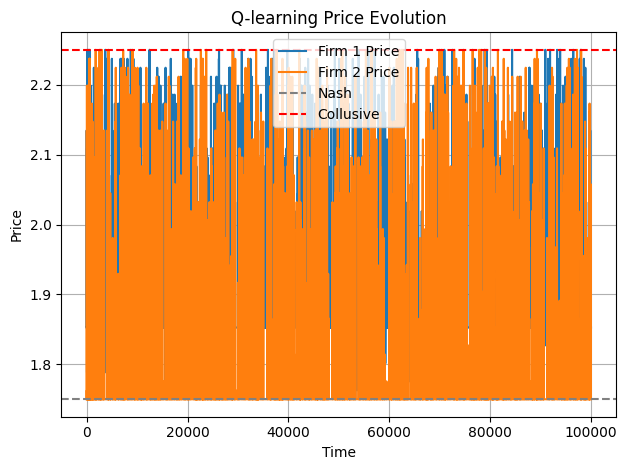

In [19]:
import matplotlib.pyplot as plt

plt.plot(prices[0], label="Firm 1 Price")
plt.plot(prices[1], label="Firm 2 Price")
plt.axhline(market.nash_price, linestyle="--", color="gray", label="Nash")
plt.axhline(market.collusive_price, linestyle="--", color="red", label="Collusive")
plt.title("Q-learning Price Evolution")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

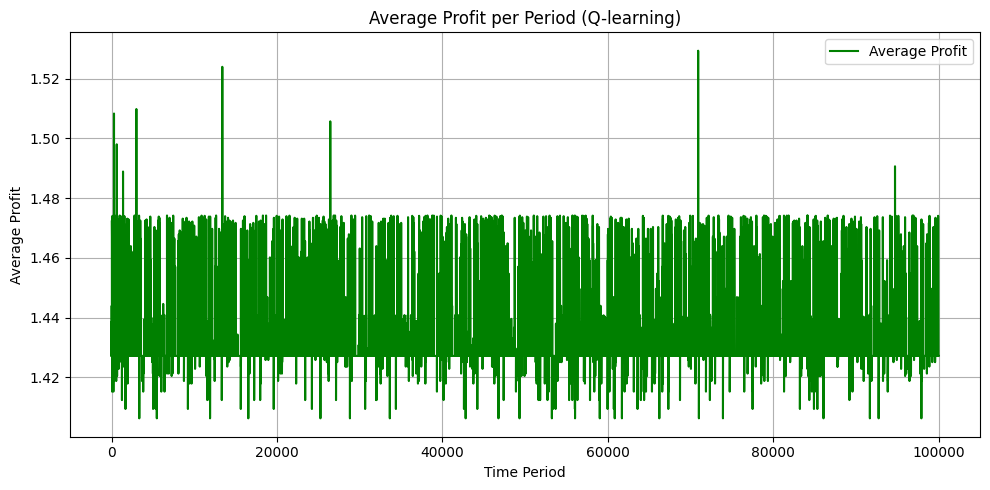

In [20]:
import matplotlib.pyplot as plt

# Compute average profit per period across the two firms
avg_profit = np.mean(market.profits, axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_profit, label="Average Profit", color='green')
plt.title("Average Profit per Period (Q-learning)")
plt.xlabel("Time Period")
plt.ylabel("Average Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

References

Abada, Ibrahim and Xavier Lambin. 2023. Artificial Intelligence: Can Seemingly Collusive Outcomes Be Avoided? Management Science 69 (9): 5042-5065. DOI: 10.1287/mnsc.2022.4623

Calvano, Emilio, Giacomo Calzolari, Vincenzo Denicolò, and Sergio Pastorello. 2020. "Artificial Intelligence, Algorithmic Pricing, and Collusion." American Economic Review 110 (10): 3267–97. DOI: 10.1257/aer.20190623

Klein, Timo. 2021. “Autonomous algorithmic collusion: Q-learning under sequential pricing.” RAND Journal of Economics 52 (3): 538-558. DOI: 10.1111/1756-2171.12383

Lambin, Xavier. 2024. Less than meets the eye: simultaneous experiments as a source of algorithmic seeming collusion. Available at SSRN: https://ssrn.com/abstract=4498926 or http://dx.doi.org/10.2139/ssrn.4498926


Assignment developed by Harold Houba and Ana Popovici